## Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [5]:
#pip install yfinance

In [6]:
# Get the data for Honda Motor Co
ticker = "HMC"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,30.139999,30.139999,29.830000,30.070000,27.658239,486500
2021-04-05,30.190001,30.500000,30.100000,30.430000,27.989365,813800
2021-04-06,29.330000,29.690001,29.139999,29.610001,27.235134,1066800
2021-04-07,29.650000,30.049999,29.639999,29.920000,27.520269,1169000
2021-04-08,29.750000,29.750000,29.430000,29.469999,27.106359,876200


In [3]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.6 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 2.2 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 1.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 1

## 2. Select the Target Variable and Clean the data

In [8]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

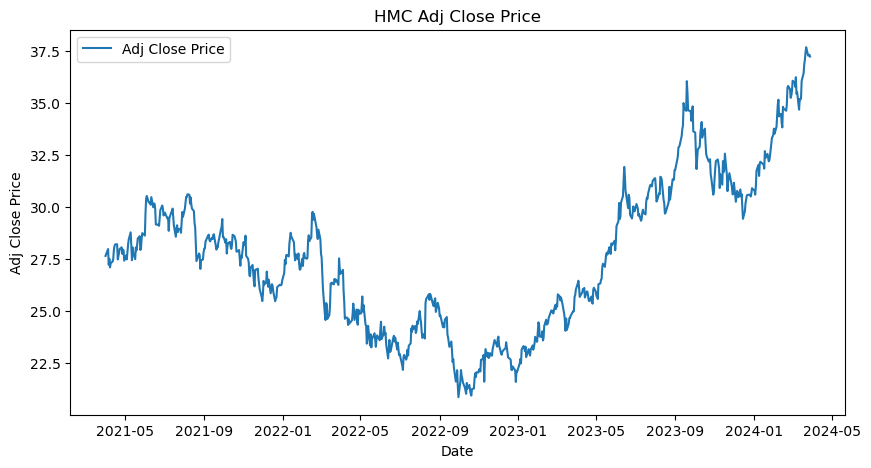

In [9]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('HMC Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
df.columns

Index(['Adj Close'], dtype='object')

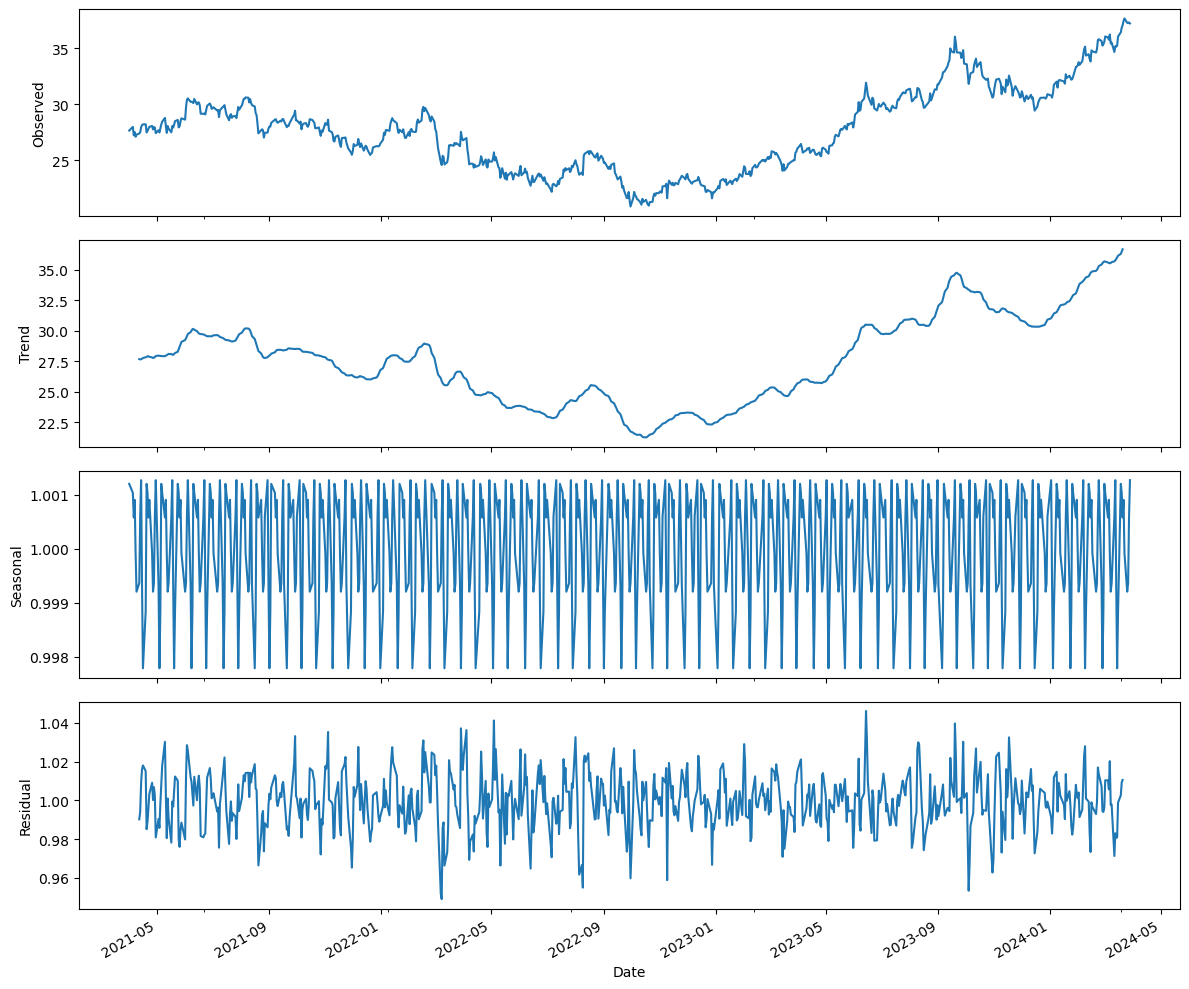

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [13]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [14]:
monthly_data = df.resample("M").mean()

In [15]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [16]:
len(monthly_data), len(train_data)

(36, 28)

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

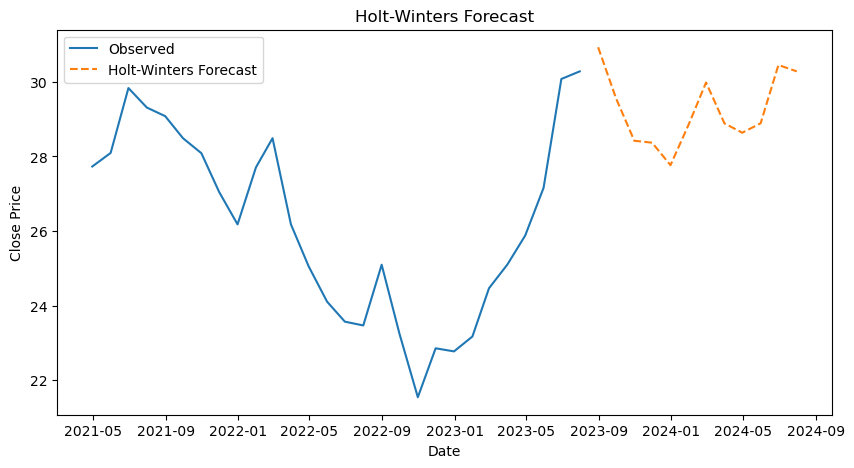

In [18]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [19]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [20]:
len(test_data), len(y_pred)

(8, 8)

In [21]:
y_pred, test_data

(2023-08-31    30.927521
 2023-09-30    29.566145
 2023-10-31    28.420196
 2023-11-30    28.368572
 2023-12-31    27.764796
 2024-01-31    28.867357
 2024-02-29    29.982701
 2024-03-31    28.886047
 Freq: M, dtype: float64,
             Adj Close
 Date                 
 2023-08-31  30.711058
 2023-09-30  34.043928
 2023-10-31  32.608637
 2023-11-30  31.526190
 2023-12-31  30.469500
 2024-01-31  32.150000
 2024-02-29  34.748000
 2024-03-31  36.298000)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 4.233014299439242
MAE: 3.775613145580429
MAPE: nan
R-squared: -3.8672040218223946


In [23]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [24]:
holt_winters_forecast

2023-08-31    30.927521
2023-09-30    29.566145
2023-10-31    28.420196
2023-11-30    28.368572
2023-12-31    27.764796
2024-01-31    28.867357
2024-02-29    29.982701
2024-03-31    28.886047
2024-04-30    28.635419
2024-05-31    28.887899
2024-06-30    30.450567
2024-07-31    30.280264
2024-08-31    30.927521
2024-09-30    29.566145
2024-10-31    28.420196
2024-11-30    28.368572
2024-12-31    27.764796
2025-01-31    28.867357
2025-02-28    29.982701
2025-03-31    28.886047
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [25]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [27]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/614.7 kB 919.0 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/614.7 kB 901.1 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 245.8/614.7 kB 1.1 MB/s eta 0:00:01
   ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [28]:
from pmdarima import auto_arima

In [29]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -43.731
Date:                Mon, 22 Jul 2024   AIC                             95.461
Time:                        20:10:00   BIC                            100.790
Sample:                    04-30-2021   HQIC                            97.090
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6818      4.385      1.296      0.195      -2.913      14.277
ar.L1          0.7882      0.167      4.720      0.000       0.461       1.115
ma.L1          0.4596      0.214      2.147      0.0

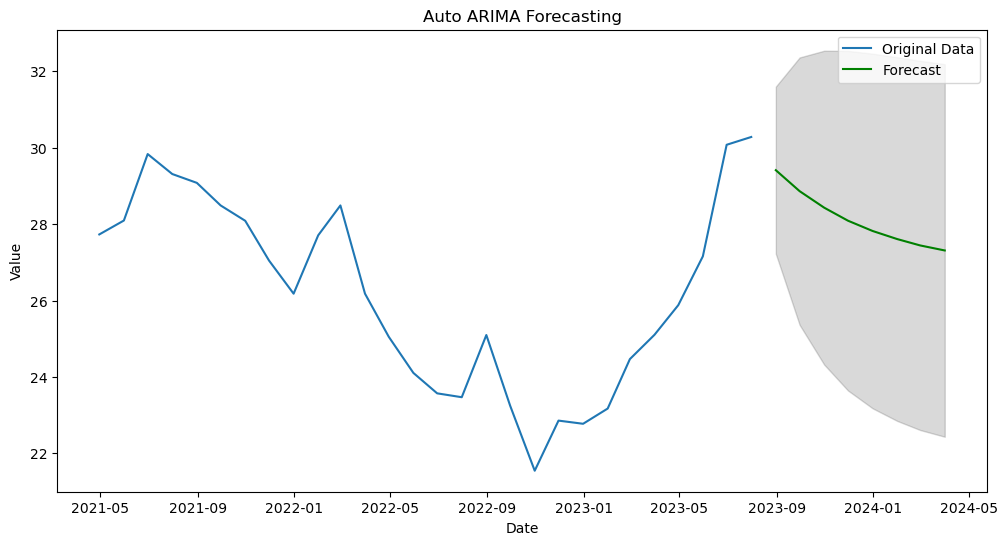

In [30]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [31]:
len(forecast)

8

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 5.239633448985262
MAE: 4.697879820068059
MAPE: nan
R-squared: -6.457304761873496


### 3.3 ARIMA Daily Data

In [33]:
daily_data= df.copy()

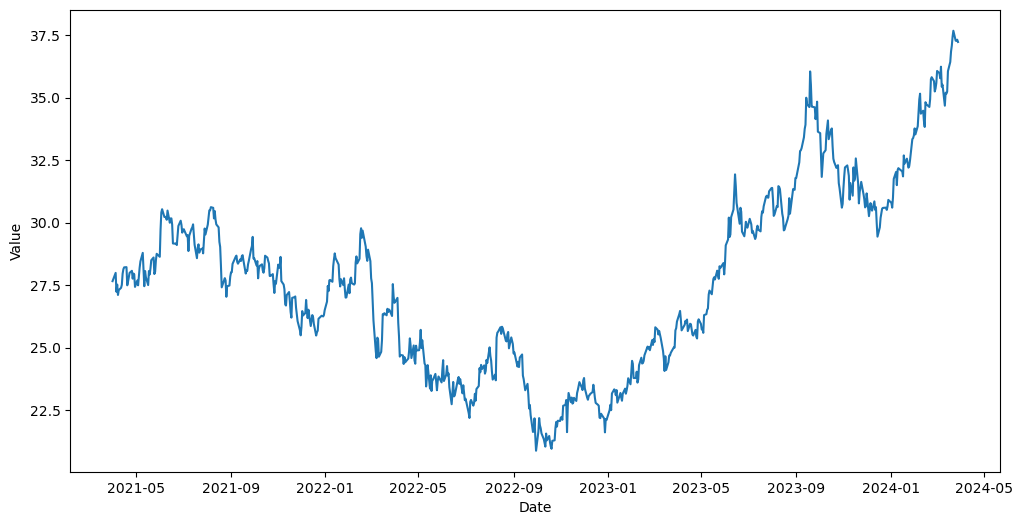

In [34]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [35]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [36]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  753
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -392.888
Date:                Mon, 22 Jul 2024   AIC                            787.776
Time:                        20:14:12   BIC                            792.399
Sample:                             0   HQIC                           789.557
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1665      0.008     21.774      0.000       0.151       0.181
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 9.05
Prob(Q):                              0.26   Pr

In [37]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [38]:
fitted_values

Date
2021-04-01     0.000000
2021-04-05    27.658239
2021-04-06    27.989365
2021-04-07    27.235134
2021-04-08    27.520269
                ...    
2024-03-22    37.439999
2024-03-25    37.680000
2024-03-26    37.279999
2024-03-27    37.279999
2024-03-28    37.320000
Name: predicted_mean, Length: 753, dtype: float64

In [39]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\aravi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\aravi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [40]:
len(forecast)

60

In [43]:
len(future_dates)

60

In [42]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

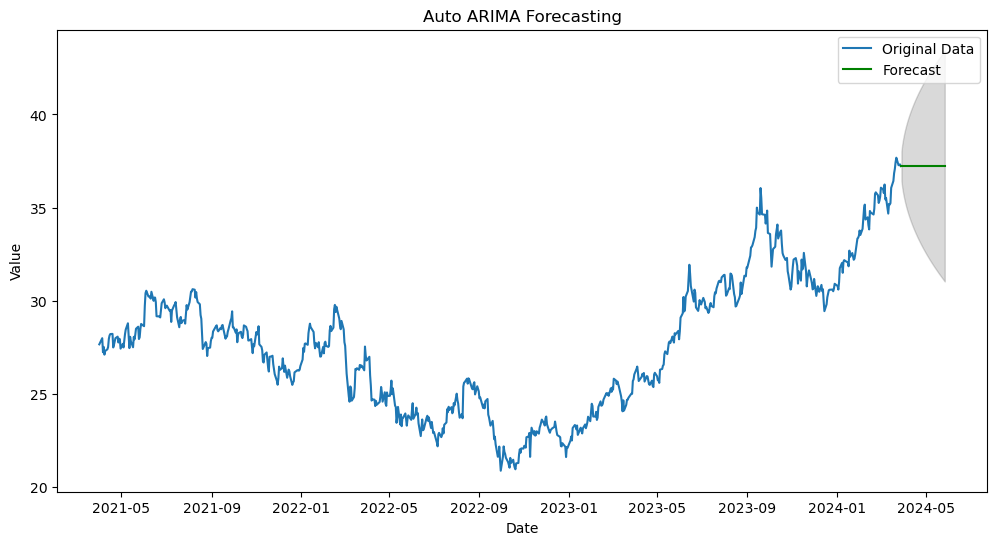

In [44]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [48]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [50]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,30.139999,30.139999,29.830000,30.070000,27.658239,486500
2021-04-05,30.190001,30.500000,30.100000,30.430000,27.989365,813800
2021-04-06,29.330000,29.690001,29.139999,29.610001,27.235134,1066800
2021-04-07,29.650000,30.049999,29.639999,29.920000,27.520269,1169000
2021-04-08,29.750000,29.750000,29.430000,29.469999,27.106359,876200


In [51]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [52]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (723, 30, 6)
Shape of y: (723,)


In [53]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\aravi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0699 - val_loss: 0.0348
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091 - val_loss: 0.0377
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - val_loss: 0.0325
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0069 - val_loss: 0.0314
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - val_loss: 0.0342
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0062 - val_loss: 0.0254
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0073 - val_loss: 0.0307
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - val_loss: 0.0239
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0070 - val_loss: 0.0254
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0055 - val_loss: 0.0198
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0057 - val_loss: 0.0238
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0

In [56]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


In [57]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 29.857238783540197, True Value: 31.783931732177734
Prediction: 30.02973663692046, True Value: 31.783931732177734
Prediction: 30.184190869813392, True Value: 32.41312026977539
Prediction: 30.31780142007574, True Value: 32.86534881591797
Prediction: 30.512966252365914, True Value: 32.894840240478516
Prediction: 30.659143521599617, True Value: 32.98332214355469
Prediction: 30.79199169358253, True Value: 33.4158935546875
Prediction: 30.98211541220371, True Value: 33.75014877319336
Prediction: 31.138690479285287, True Value: 33.91727828979492
Prediction: 31.391316193275088, True Value: 34.998695373535156


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 2.0940737202077098
MAE: 1.8921263932002272
MAPE: 6.018617942325282
R-squared: -0.09269272148595387


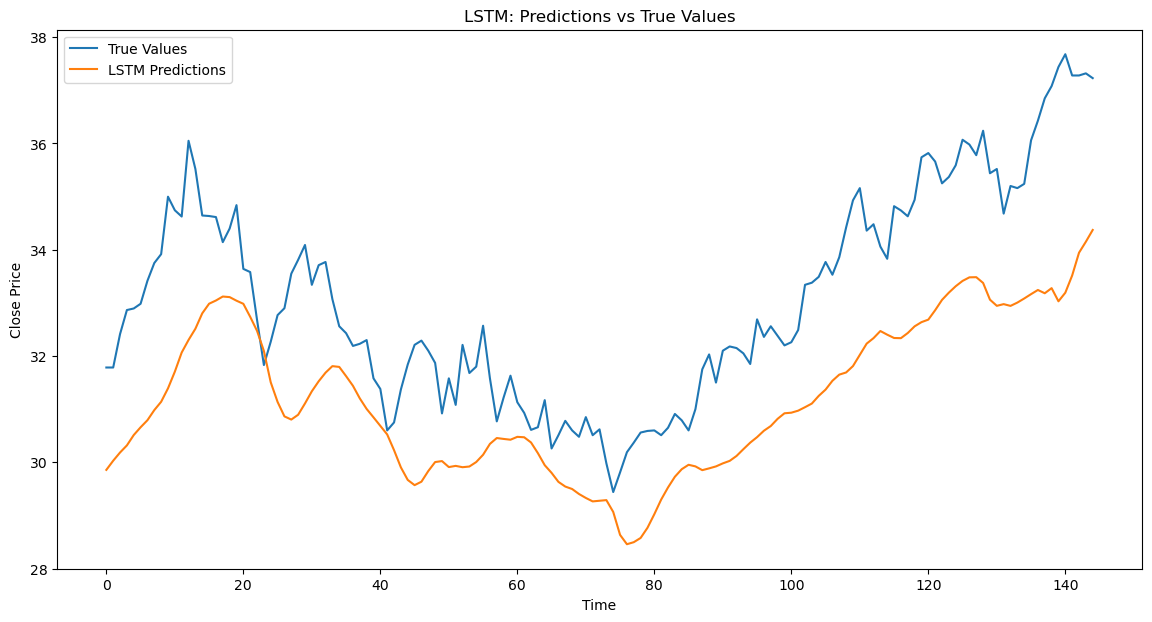

In [59]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [60]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [61]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [62]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [63]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0011422495184562253


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.03379718210822058
MAE: 0.026598037502801417
MAPE: inf
R-squared: 0.9775822638189101


C:\Users\aravi\AppData\Local\Temp\ipykernel_27400\1497539800.py:12: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100


In [65]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0006684034733613466


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.025853500214890565
MAE: 0.020403255604951286
MAPE: 12855.172781973777
R-squared: 0.986881944368346


In [67]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.15640538427947992, True Value: 0.17050634451290647
Prediction: 0.4535361002194276, True Value: 0.5029721889091541
Prediction: 0.8404707023040339, True Value: 0.7596325202927274
Prediction: 0.4902017969991912, True Value: 0.5241312325068566
Prediction: 0.2692128391842783, True Value: 0.20361837416693374
Prediction: 0.22183371266351526, True Value: 0.17313332328645492
Prediction: 0.5317928094612543, True Value: 0.4973160536103851
Prediction: 0.4468200495141639, True Value: 0.45209148318252423
Prediction: 0.1733265819521146, True Value: 0.1795308319632356
Prediction: 0.2894766287518056, True Value: 0.2766083024739834


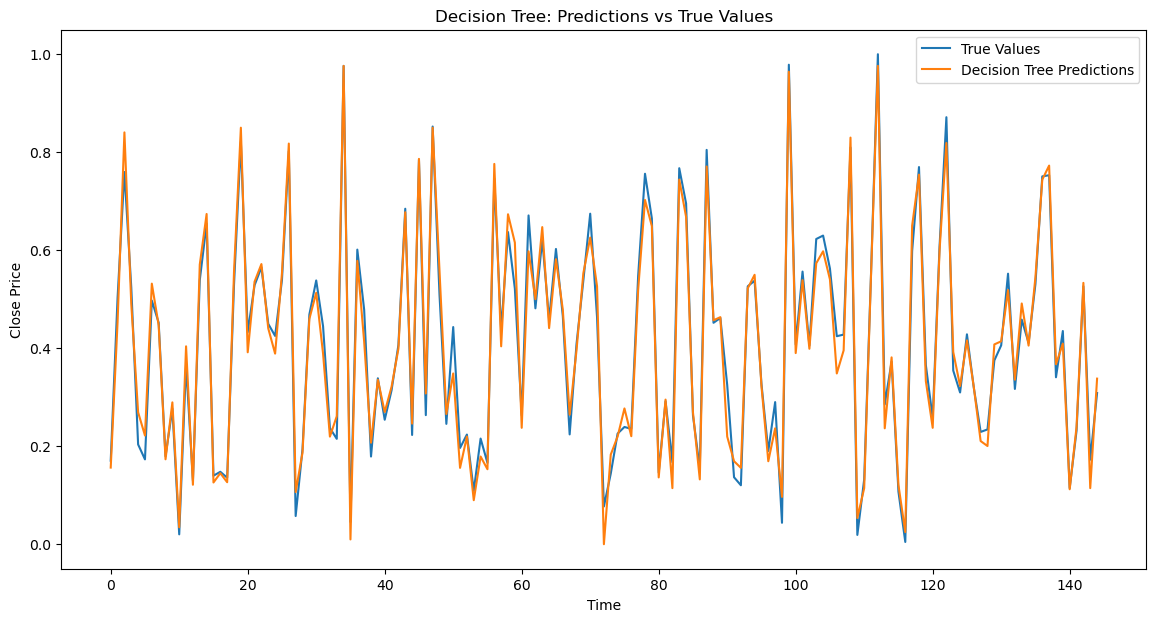

In [68]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [69]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.18643094707867353, True Value: 0.17050634451290647
Prediction: 0.49462067057466025, True Value: 0.5029721889091541
Prediction: 0.8329621344653618, True Value: 0.7596325202927274
Prediction: 0.5168703716648981, True Value: 0.5241312325068566
Prediction: 0.1818461468103129, True Value: 0.20361837416693374
Prediction: 0.20736202602262552, True Value: 0.17313332328645492
Prediction: 0.5154136677339961, True Value: 0.4973160536103851
Prediction: 0.44414865302227957, True Value: 0.45209148318252423
Prediction: 0.16565295895698873, True Value: 0.1795308319632356
Prediction: 0.28740193058938557, True Value: 0.2766083024739834


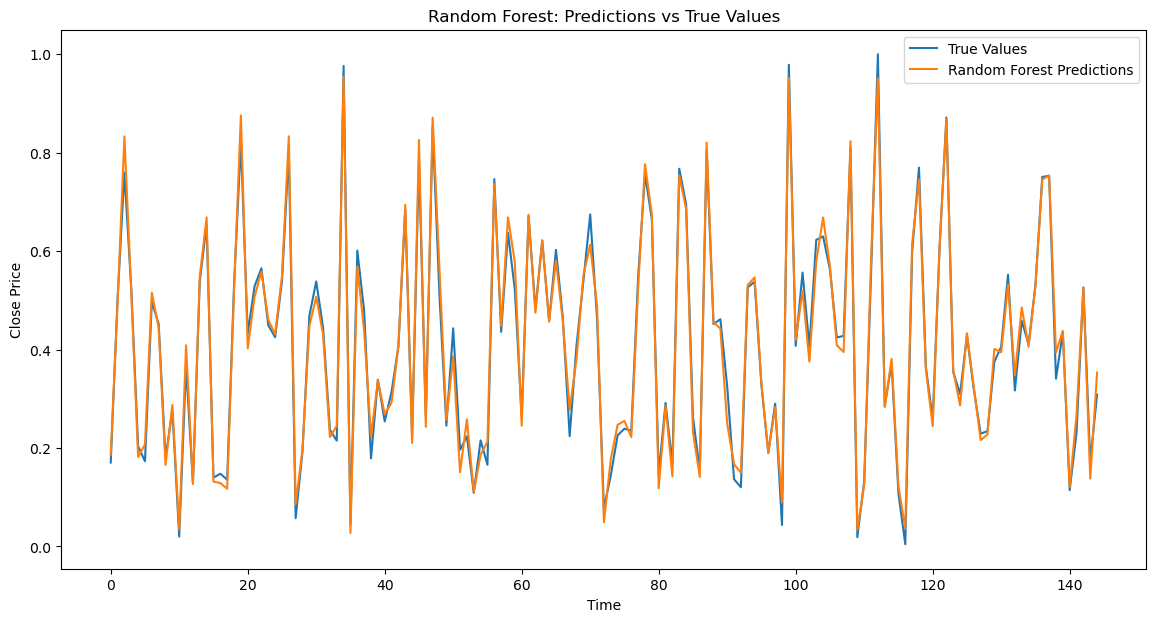

In [70]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

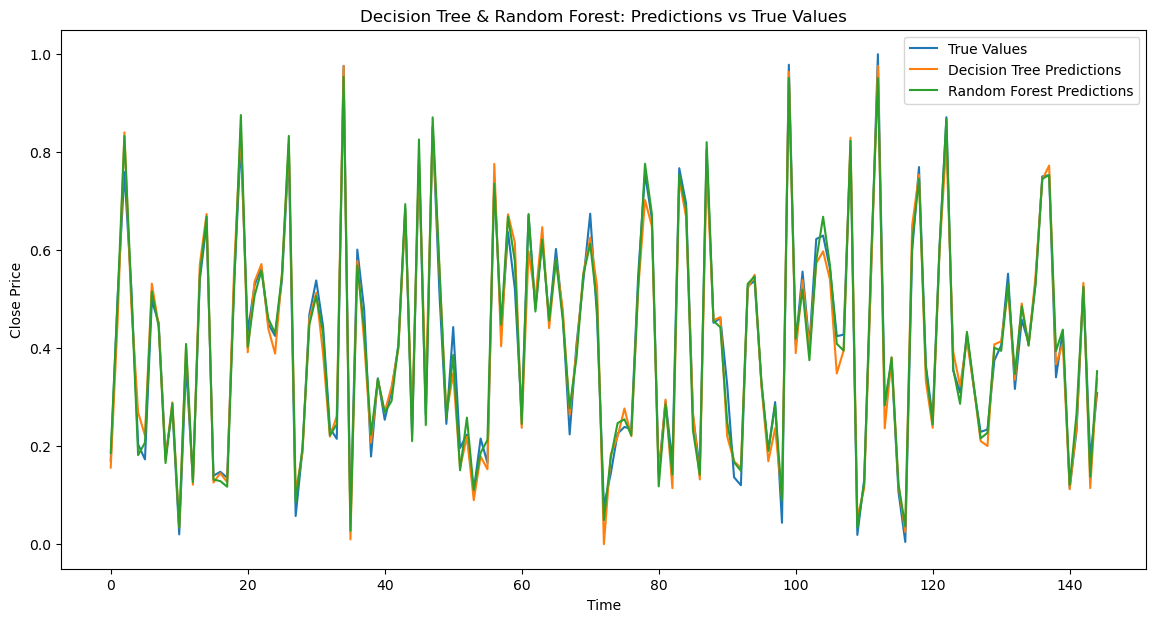

In [71]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()